# Exploratory Data Analysis on Layoffs.fyi dataset (from Kaggle)

In [ ]:
#read csv file of layoffs.fyi dataset from Kaggle and show first 5 records of dataset

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


layoffs_df = pd.read_csv('https://gist.githubusercontent.com/bmurill2019/6ca682ef0817af9983a2c68062e89a34/raw/ebefdeb197735cc21c39f205ccca738388ffee35/layoffs_data.csv')
layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Veeam,Columbus,Data,200.0,2023-03-23,https://blocksandfiles.com/2023/03/23/200-peop...,500.0,Acquired,2023-03-24 18:36:13,United States,NaN,Unknown
1,TakeOff,Kyiv,Retail,50.0,2023-03-23,https://dou.ua/lenta/news/takeoff-layoff/?,146.0,Unknown,2023-03-26 21:25:22,Ukraine,NaN,Unknown
2,Slite,Paris,Other,10.0,2023-03-23,https://www.linkedin.com/posts/christophepasqu...,15.0,Series A,2023-03-24 18:39:58,France,0.25,Unknown
3,Indeed,Austin,HR,2200.0,2023-03-22,https://www.indeed.com/press/releases/a-messag...,5.0,Acquired,2023-03-22 16:24:35,United States,0.15,Unknown
4,Logitech,Geneva,Hardware,300.0,2023-03-22,https://www.bloomberg.com/news/articles/2023-0...,NaN,Post-IPO,2023-03-23 16:47:11,Switzerland,NaN,Unknown


In [ ]:
import altair as alt
import pandas as pd

# Explore the proportion of funds raised as color luminance and % of layoffs by industry for top 50 companies having the highest layoffs

# Calculate the percentage of layoffs by industry for the top 50 companies
df_top_50 = layoffs_df.nlargest(50, 'Laid_Off_Count')
df_by_industry = df_top_50.groupby('Industry').sum()
df_by_industry['Laid_Off_Percent'] = df_by_industry['Laid_Off_Count'] / df_by_industry['Laid_Off_Count'].sum() 

# Calculate the percent of total funds raised for each industry
df_by_industry['Funds_Raised_Percent'] = df_by_industry['Funds_Raised'] / df_by_industry['Funds_Raised'].sum() 

# Create the scatter plot
chart = alt.Chart(df_by_industry.reset_index()).mark_circle().encode(
    alt.X('Funds_Raised_Percent:Q', title='% of Total Funds Raised', axis=alt.Axis(format='.0%')),
    alt.Y('Laid_Off_Percent:Q', title='% of Total Layoffs', axis=alt.Axis(format='.0%')),
    color=alt.Color('Funds_Raised_Percent:Q', scale=alt.Scale(scheme='goldgreen'), legend=alt.Legend(title='% of Total Funds Raised')),
    tooltip=['Industry', 'Laid_Off_Percent', 'Funds_Raised_Percent'],
    text='Industry'
).properties(
    width=500,
    height=500
).configure_circle(
    size=200
)

chart


<ipython-input-3-3a698f1702fb>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_industry = df_top_50.groupby('Industry').sum()


alt.Chart(...)

In [ ]:
import altair as alt
import pandas as pd

# Explore the proportion of funds raised as color luminance and % of layoffs by industry for top 50 companies having the highest layoffs

# Calculate the percentage of layoffs by stage for the top 50 companies
df_top_50 = layoffs_df.nlargest(50, 'Laid_Off_Count')
df_by_industry = df_top_50.groupby(['Industry', 'Stage']).sum()
df_by_industry['Laid_Off_Percent'] = df_by_industry['Laid_Off_Count'] / df_by_industry['Laid_Off_Count'].sum()

# Calculate the percent of total funds raised for each industry
df_by_industry['Funds_Raised_Percent'] = df_by_industry['Funds_Raised'] / df_by_industry['Funds_Raised'].sum()

# Sort the dataframe by % layoffs
df_by_industry = df_by_industry.reset_index().sort_values('Laid_Off_Percent', ascending=False)

# Create the bar chart
chart = alt.Chart(df_by_industry).mark_bar().encode(
    alt.X('Laid_Off_Percent:Q', title='% of Total Layoffs', axis=alt.Axis(format='.0%')),
    alt.Y('Stage:N', title='Funding Stage', sort=alt.EncodingSortField(field='Laid_Off_Percent', order='descending')),
    color=alt.Color('Funds_Raised_Percent:Q', scale=alt.Scale(scheme='goldgreen'), legend=alt.Legend(title='% of Total Funds Raised')),
    tooltip=['Stage', 'Laid_Off_Percent', 'Funds_Raised_Percent', 'Industry'],
    text=alt.Text('Laid_Off_Percent:Q', format='.0%'),
).properties(
    width=800,
    height=500
)

chart 


<ipython-input-4-487602291752>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_industry = df_top_50.groupby(['Industry', 'Stage']).sum()


alt.Chart(...)

In [ ]:
layoffs_df.describe()

,Laid_Off_Count,Funds_Raised,Percentage
count,1662.000000,2207.000000,1613.000000
mean,248.092659,823.646260,0.257698
std,827.461260,5551.237786,0.255861
min,3.000000,0.000000,0.000000
25%,37.000000,50.000000,0.100000
50%,80.000000,156.000000,0.170000
75%,180.000000,445.000000,0.300000
max,12000.000000,121900.000000,1.000000


In [ ]:
#show layoffs.fyi dataset information datatypes and attributes
layoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2429 non-null   object 
 1   Location_HQ                 2429 non-null   object 
 2   Industry                    2429 non-null   object 
 3   Laid_Off_Count              1662 non-null   float64
 4   Date                        2428 non-null   object 
 5   Source                      2429 non-null   object 
 6   Funds_Raised                2207 non-null   float64
 7   Stage                       2429 non-null   object 
 8   Date_Added                  2429 non-null   object 
 9   Country                     2429 non-null   object 
 10  Percentage                  1613 non-null   float64
 11  List_of_Employees_Laid_Off  2428 non-null   object 
dtypes: float64(3), object(9)
memory usage: 227.8+ KB


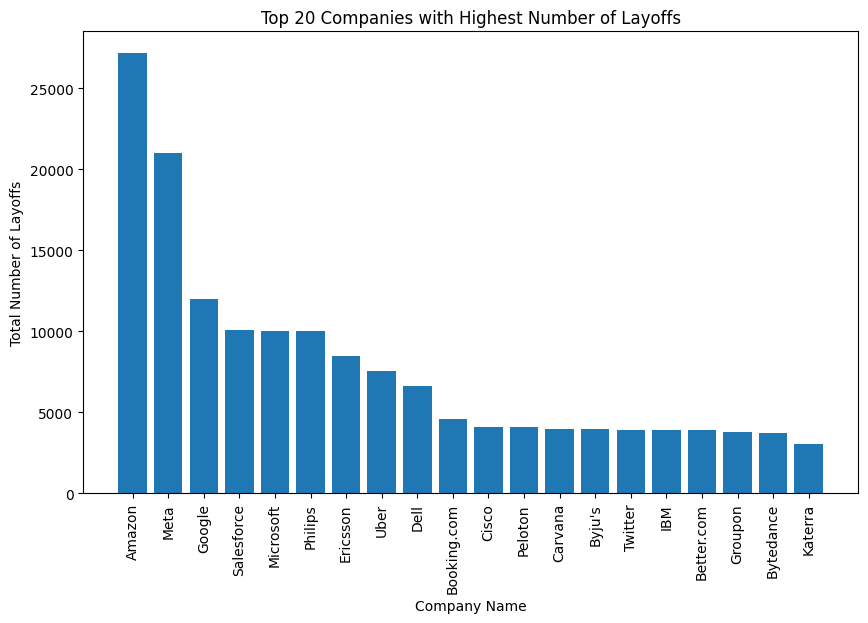

In [ ]:
#Get unique counts of companies and visualize the number of layoffs in descending order starting with the company with the highest number of layoffs
company_layoffs = layoffs_df.groupby("Company")["Laid_Off_Count"].sum()

#Sort the companies by the number of layoffs in descending order
company_layoffs = company_layoffs.sort_values(ascending=False)

#Take the top 20 companies
top_20_companies = company_layoffs[:20]

#Plot bar chart showing layoffs in descending order starting with the company with the highest number of layoffs
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_20_companies.index, top_20_companies.values)
ax.set_title("Top 20 Companies with Highest Number of Layoffs")
ax.set_xlabel("Company Name")
ax.set_ylabel("Total Number of Layoffs")
ax.tick_params(axis='x', labelrotation=90)


plt.show()

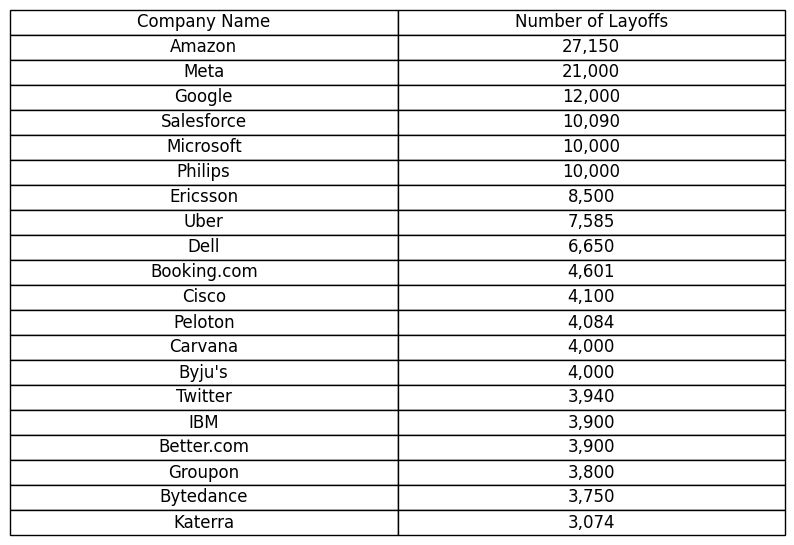

In [ ]:
import numpy as np

# Show data table of top 20 companies with the highest number of layoffs

# Create a table for the top 20 companies
table_data = []
for company, layoffs in top_20_companies.iteritems():
    formatted_layoffs = format(layoffs, ',.0f')
    table_data.append([company, formatted_layoffs])

columns = ["Company Name", "Number of Layoffs"]
table_fig, table_ax = plt.subplots(figsize=(10, 3))
table = table_ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)


# Remove axis ticks and labels
table_ax.axis('off')


# Show the table
plt.show()

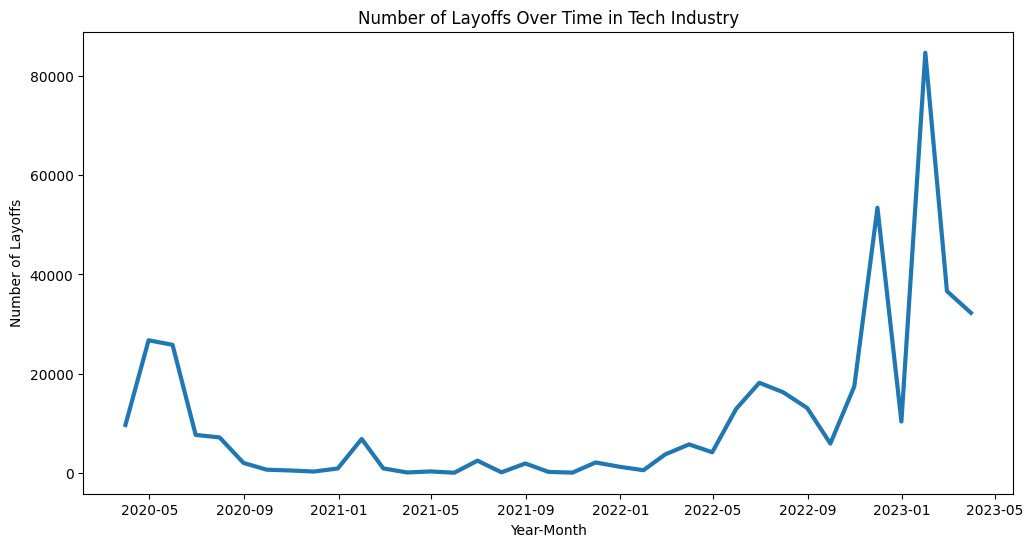

In [ ]:
#Create line chart showing total layoffs by month

layoffs_df['Date'] = pd.to_datetime(layoffs_df['Date'])

#Group df by month and count number of layoffs by month

monthly_layoffs = layoffs_df.groupby(pd.Grouper(key='Date', freq='M'))['Laid_Off_Count'].sum()

# Increase the figure size
plt.figure(figsize=(12,6))

#Create the line chart 

plt.plot(monthly_layoffs.index, monthly_layoffs.values, linewidth=3)

#Add labels and title to the line chart

plt.xlabel('Year-Month')
plt.ylabel('Number of Layoffs')
plt.title('Number of Layoffs Over Time in Tech Industry')


# Display the chart and table
plt.show()





In [ ]:
# Line Chart showing layoffs by quarter
import altair as alt
import pandas as pd

layoffs_df['Date'] = pd.to_datetime(layoffs_df['Date'])

# Group df by quarter and count number of layoffs by quarter
yearly_layoffs = (layoffs_df.groupby(pd.Grouper(key='Date', freq='Q'))['Laid_Off_Count'].sum().reset_index())

# Create a new column with the quarter-year format
yearly_layoffs['Year-Quarter'] =   yearly_layoffs['Date'].dt.year.astype(str) +'-' + 'Q' + yearly_layoffs['Date'].dt.quarter.astype(str) 

# sort the dataframe by Laid_Off_Count in descending order
yearly_layoffs = yearly_layoffs.sort_values(by='Laid_Off_Count', ascending=False)

source = yearly_layoffs

chart = alt.Chart(source, width=600).mark_line(strokeWidth=4).encode(
    x='Year-Quarter:O',
    y='Laid_Off_Count:Q'
)

# Add points to the line chart
points = chart.mark_circle(size=60).encode(
    x='Year-Quarter:O',
    y='Laid_Off_Count:Q'
)

chart.title = "Layoffs by Quarter"

chart + points



alt.LayerChart(...)

In [ ]:
import pandas as pd

# create a DataFrame with the monthly layoffs data
monthly_layoffs = layoffs_df.groupby(pd.Grouper(key='Date', freq='M')).sum()

# add a column with the year and month
monthly_layoffs['year_month'] = monthly_layoffs.index.strftime('%Y-%m')

# create a table of the monthly layoffs data
table = monthly_layoffs[['year_month', 'Laid_Off_Count']].reset_index(drop=True)
table = table.style.format({'layoffs': '{:,.0f}'})

# display the table
table

,year_month,Laid_Off_Count
0,2020-03,9628.000000
1,2020-04,26710.000000
2,2020-05,25804.000000
3,2020-06,7627.000000
4,2020-07,7112.000000
5,2020-08,1969.000000
6,2020-09,609.000000
7,2020-10,450.000000
8,2020-11,237.000000
9,2020-12,852.000000


In [ ]:
import altair as alt
import pandas as pd

layoffs_df['Date'] = pd.to_datetime(layoffs_df['Date'])

# Group df by quarter and count number of layoffs by quarter
yearly_layoffs = (layoffs_df.groupby(pd.Grouper(key='Date', freq='Q'))['Laid_Off_Count'].sum().reset_index())

# Create a new column with the quarter-year format
yearly_layoffs['Year-Quarter'] =   yearly_layoffs['Date'].dt.year.astype(str) +'-' + 'Q' + yearly_layoffs['Date'].dt.quarter.astype(str) 

# sort the dataframe by Laid_Off_Count in descending order
yearly_layoffs = yearly_layoffs.sort_values(by='Laid_Off_Count', ascending=False)


alt.Chart(yearly_layoffs, width=800, height=400).mark_area(
    color="lightblue",
    interpolate='step-after',
    line=True
).encode(
    x=alt.X('Year-Quarter:N', axis=alt.Axis(labelAngle=-45)),
    y='Laid_Off_Count:Q',
)


alt.Chart(...)

In [ ]:
# Cumulative Line Chart 
import altair as alt
import pandas as pd

layoffs_df['Date'] = pd.to_datetime(layoffs_df['Date'])

# Group df by quarter and count number of layoffs by quarter
yearly_layoffs = (layoffs_df.groupby(pd.Grouper(key='Date', freq='Q'))['Laid_Off_Count'].sum().reset_index())

# Create a new column with the quarter-year format
yearly_layoffs['Year-Quarter'] =   yearly_layoffs['Date'].dt.year.astype(str) +'-' + 'Q' + yearly_layoffs['Date'].dt.quarter.astype(str) 

# sort the dataframe by Laid_Off_Count in descending order
yearly_layoffs = yearly_layoffs.sort_values(by='Laid_Off_Count', ascending=False)

source = yearly_layoffs

chart = alt.Chart(source, width=600).mark_line(strokeWidth=4).transform_window(
    # Sort the data chronologically
    sort=[{'field': 'Year-Quarter'}],
    # Include all previous records before the current record and none after
    # (This is the default value so you could skip it and it would still work.)
    frame=[None, 0],
    # What to add up as you go
    cumulative_layoffs='sum(Laid_Off_Count)'
).encode(
    x='Year-Quarter:O',
    # Plot the calculated field created by the transformation
    y='cumulative_layoffs:Q'
)

# Add points to the line chart
points = chart.mark_circle(size=60).encode(
    x='Year-Quarter:O',
    y='cumulative_layoffs:Q'
)

chart.title = "Cumulative Layoffs by Quarter"

chart + points



alt.LayerChart(...)

In [ ]:
# Cumulative Line Chart 
import altair as alt
import pandas as pd

layoffs_df['Date'] = pd.to_datetime(layoffs_df['Date'])

# Group df by quarter and count number of layoffs by quarter
yearly_layoffs = (layoffs_df.groupby(pd.Grouper(key='Date', freq='Q'))['Laid_Off_Count'].sum().reset_index())

# Create a new column with the quarter-year format
yearly_layoffs['Year-Quarter'] =   yearly_layoffs['Date'].dt.year.astype(str) +'-' + 'Q' + yearly_layoffs['Date'].dt.quarter.astype(str) 

# sort the dataframe by Laid_Off_Count in descending order
yearly_layoffs = yearly_layoffs.sort_values(by='Laid_Off_Count', ascending=False)

source = yearly_layoffs

chart = alt.Chart(source, width=600).mark_line(strokeWidth=4, interpolate='step-after').transform_window(
    # Sort the data chronologically
    sort=[{'field': 'Year-Quarter'}],
    # Include all previous records before the current record and none after
    # (This is the default value so you could skip it and it would still work.)
    frame=[None, 0],
    # What to add up as you go
    cumulative_layoffs='sum(Laid_Off_Count)'
).encode(
    x='Year-Quarter:O',
    # Plot the calculated field created by the transformation
    y='cumulative_layoffs:Q'
)

# Add points to the line chart
points = chart.mark_circle(size=60).encode(
    x='Year-Quarter:O',
    y='cumulative_layoffs:Q'
)

chart.title = "Cumulative Layoffs by Quarter"

chart + points



alt.LayerChart(...)

In [ ]:
import altair as alt
import pandas as pd

#Sum the number of layoffs by company and group the results
company_layoffs = layoffs_df.groupby("Company")["Laid_Off_Count"].sum()

#Sort the companies by the number of layoffs in descending order
company_layoffs = company_layoffs.sort_values(ascending=False)

#Take the top 20 companies
top_20_companies = company_layoffs[:20].reset_index().sort_values(by='Laid_Off_Count', ascending=False)

source = top_20_companies

chart = alt.Chart(source).transform_joinaggregate(
    TotalLayoffs='sum(Laid_Off_Count)',
).transform_calculate(
    PercentOfTotal="datum.Laid_Off_Count / datum.TotalLayoffs"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y=alt.Y('Company:N', sort=alt.EncodingSortField(field='PercentOfTotal', order='descending')))

text = chart.mark_text( 
    align='left',
    dx=5,  
    color='black'
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')  # Adds percentage text to bar
)


chart + text

alt.LayerChart(...)

In [ ]:
#read csv file of layoffs.fyi dataset from Kaggle and show first 5 records of dataset

import pandas as pd
import matplotlib.pyplot as plt

businessForm = pd.read_csv('https://www.census.gov/econ/bfs/csv/bfs_monthly.csv')
businessForm.head()

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,U,TOTAL,BA_BA,US,2023,439183,462896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U,NAICS11,BA_BA,US,2023,4332,4305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U,NAICS21,BA_BA,US,2023,582,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U,NAICS22,BA_BA,US,2023,532,576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U,NAICS23,BA_BA,US,2023,40992,45284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# mapper = "https://www.census.gov/econ/bfs/pdf/bfs_monthly_data_dictionary.pdf"
businessForm.geo.describe()

count     31388
unique       56
top          US
freq       8673
Name: geo, dtype: object

Looking at the dataset, it is possible to see some categorical attributes are encoded (which is good for storing porpuses) so a mapper function is needed in order to make it as human readable as possible.

In [ ]:
from urllib.request import urlopen
mapperURL = "https://gist.githubusercontent.com/bmurill2019/efe5f243a335ec81e69a61de94dab97d/raw/5ad6f5fb1e24b5900f8e4d861731160b24082ef4/bfs_mapper.csv"
mapperBusForm = {}
for line in urlopen(mapperURL):
    vals = line.decode('utf-8').replace('\n','').split(',')
    if len(vals) == 3:
        col, code, verbose = vals
        if col not in mapperBusForm:
            mapperBusForm[col] = {code: verbose}
        else:
            mapperBusForm[col][code] = verbose
mapperBusForm


{'sa': {'A': 'Seasonally Adjusted', 'U': 'Not Seasonally Adjusted'},
 'naics_sector': {'TOTAL': 'Total for All NAICS',
  'NAICS11': 'Agriculture',
  'NAICS21': 'Mining',
  'NAICS22': 'Utilities',
  'NAICS23': 'Construction',
  'NAICSMNF': 'Manufacturing',
  'NAICS42': 'Wholesale Trade',
  'NAICSRET': 'Retail Trade',
  'NAICSTW': 'Transportation and Warehousing',
  'NAICS51': 'Information',
  'NAICS52': 'Finance and Insurance',
  'NAICS53': 'Real Estate',
  'NAICS54': 'Professional Services',
  'NAICS55': 'Management of Companies',
  'NAICS56': 'Administrative and Support',
  'NAICS61': 'Educational Services',
  'NAICS62': 'Health Care and Social Assistance',
  'NAICS71': 'Arts and Entertainment',
  'NAICS72': 'Accommodation and Food Services',
  'NAICS81': 'Other Services',
  'NAICS92': 'Public Administration',
  'NONAICS': 'No NAICS Assigned'},
 'series': {'BA_BA': 'Business Applications',
  'BA_CBA': 'Business Applications from Corporations',
  'BA_HBA': 'High‐Propensity Business App

In [ ]:
businessFormVerbose = businessForm.replace(mapperBusForm)
businessFormVerbose.head()

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,Not Seasonally Adjusted,Total for All NAICS,Business Applications,U.S. Total,2023,439183,462896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Not Seasonally Adjusted,Agriculture,Business Applications,U.S. Total,2023,4332,4305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Not Seasonally Adjusted,Mining,Business Applications,U.S. Total,2023,582,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,Utilities,Business Applications,U.S. Total,2023,532,576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Not Seasonally Adjusted,Construction,Business Applications,U.S. Total,2023,40992,45284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
businessFormVerbose.dtypes

sa              object
naics_sector    object
series          object
geo             object
year             int64
jan             object
feb             object
mar             object
apr             object
may             object
jun             object
jul             object
aug             object
sep             object
oct             object
nov             object
dec             object
dtype: object

In [ ]:
businessFormVerbose.isna().sum()

sa                 0
naics_sector       0
series             0
geo                0
year               0
jan             1672
feb             1672
mar             2888
apr             2888
may             2888
jun             2888
jul             1216
aug             1216
sep             1216
oct             1216
nov             1216
dec             1216
dtype: int64

After carefully looking at the data, it can be seen that the null values belongs to the years 2004 and 2023, it could be that the cencus department started its records on July of 2004, so there is not data before, and has been recording the data until nowadays, what means that it mus not be records for the 2023 months afther February. To prove so, some portions of the dataset are drawn and the null values are counted again.

In [ ]:
businessFormVerbose2023 = businessFormVerbose.loc[businessFormVerbose.year == 2023]
businessFormVerbose2004 = businessFormVerbose.loc[businessFormVerbose.year == 2004]

In [ ]:
businessFormVerbose2023.isna().sum()

sa                 0
naics_sector       0
series             0
geo                0
year               0
jan                0
feb                0
mar             1216
apr             1216
may             1216
jun             1216
jul             1216
aug             1216
sep             1216
oct             1216
nov             1216
dec             1216
dtype: int64

In [ ]:
businessFormVerbose2004.isna().sum()

sa                 0
naics_sector       0
series             0
geo                0
year               0
jan             1672
feb             1672
mar             1672
apr             1672
may             1672
jun             1672
jul                0
aug                0
sep                0
oct                0
nov                0
dec                0
dtype: int64

In [ ]:
businessFormVerbose2023.isna().sum() + businessFormVerbose2004.isna().sum()

sa                 0
naics_sector       0
series             0
geo                0
year               0
jan             1672
feb             1672
mar             2888
apr             2888
may             2888
jun             2888
jul             1216
aug             1216
sep             1216
oct             1216
nov             1216
dec             1216
dtype: int64

So we can see these two subsets sum up the total number of null values, now we can safely assume that the null values will be replaced with zero.

In [ ]:
businessFormVerbose = businessFormVerbose.fillna(0)

In [ ]:
for col in businessFormVerbose.columns:
    print(col)

sa
naics_sector
series
geo
year
jan
feb
mar
apr
may
jun
jul
aug
sep
oct
nov
dec


In [ ]:
businessFormVerbose.series.describe()

count                     31388
unique                       12
top       Business Applications
freq                       3040
Name: series, dtype: object

In [ ]:
import pandas as pd